In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
X = cars.drop('price', axis=1).copy()
y = cars.price

In [7]:
X_int = X.select_dtypes('int')
X_int

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,1,3,2548,130,111,5000,21,27
1,2,3,2548,130,111,5000,21,27
2,3,1,2823,152,154,5000,19,26
3,4,2,2337,109,102,5500,24,30
4,5,2,2824,136,115,5500,18,22
...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28
201,202,-1,3049,141,160,5300,19,25
202,203,-1,3012,173,134,5500,18,23
203,204,-1,3217,145,106,4800,26,27


In [8]:
X_float = X.select_dtypes('float')
X_float

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0
...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,3.78,3.15,9.5
201,109.1,188.8,68.8,55.5,3.78,3.15,8.7
202,109.1,188.8,68.9,55.5,3.58,2.87,8.8
203,109.1,188.8,68.9,55.5,3.01,3.40,23.0


In [9]:
X_num = pd.concat([X_int, X_float], axis=1)
X_num

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio
0,1,3,2548,130,111,5000,21,27,88.6,168.8,64.1,48.8,3.47,2.68,9.0
1,2,3,2548,130,111,5000,21,27,88.6,168.8,64.1,48.8,3.47,2.68,9.0
2,3,1,2823,152,154,5000,19,26,94.5,171.2,65.5,52.4,2.68,3.47,9.0
3,4,2,2337,109,102,5500,24,30,99.8,176.6,66.2,54.3,3.19,3.40,10.0
4,5,2,2824,136,115,5500,18,22,99.4,176.6,66.4,54.3,3.19,3.40,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28,109.1,188.8,68.9,55.5,3.78,3.15,9.5
201,202,-1,3049,141,160,5300,19,25,109.1,188.8,68.8,55.5,3.78,3.15,8.7
202,203,-1,3012,173,134,5500,18,23,109.1,188.8,68.9,55.5,3.58,2.87,8.8
203,204,-1,3217,145,106,4800,26,27,109.1,188.8,68.9,55.5,3.01,3.40,23.0


In [10]:
X_cat = X.select_dtypes('object')
X_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


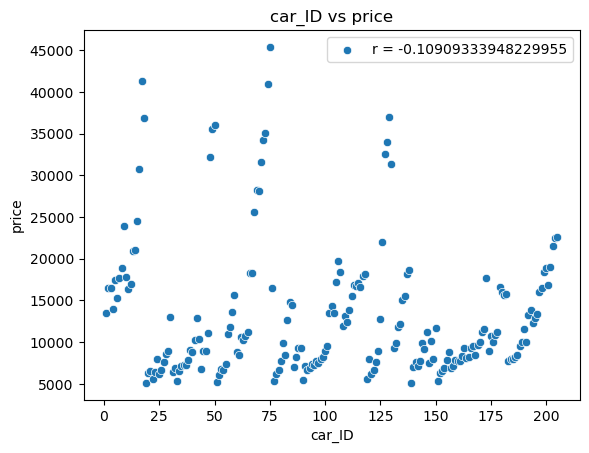

<Figure size 400x300 with 0 Axes>

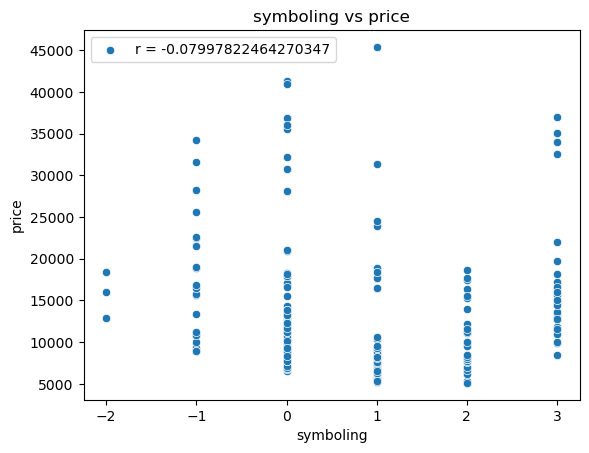

<Figure size 400x300 with 0 Axes>

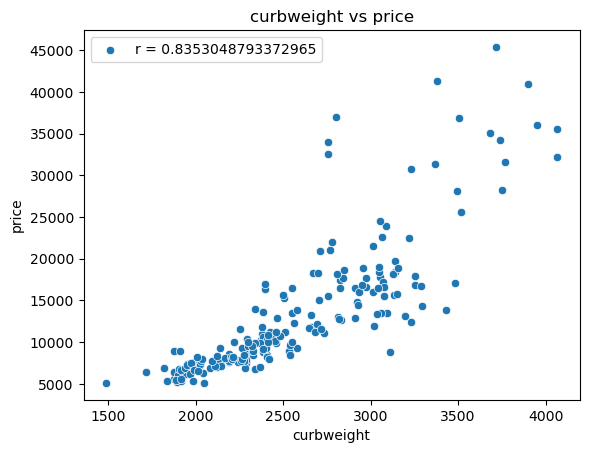

<Figure size 400x300 with 0 Axes>

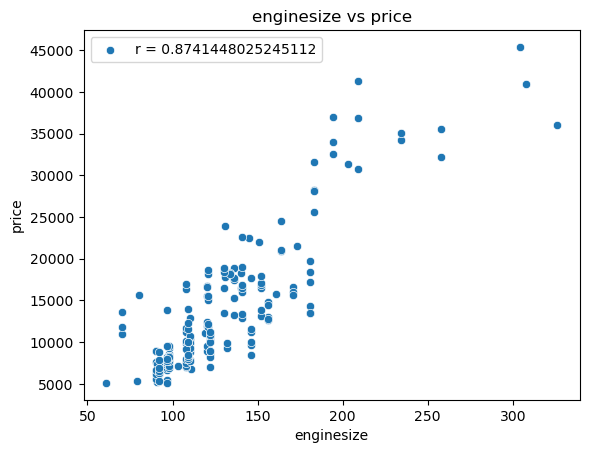

<Figure size 400x300 with 0 Axes>

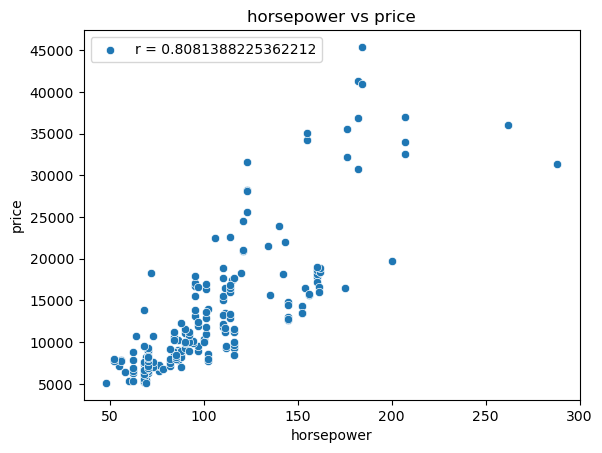

<Figure size 400x300 with 0 Axes>

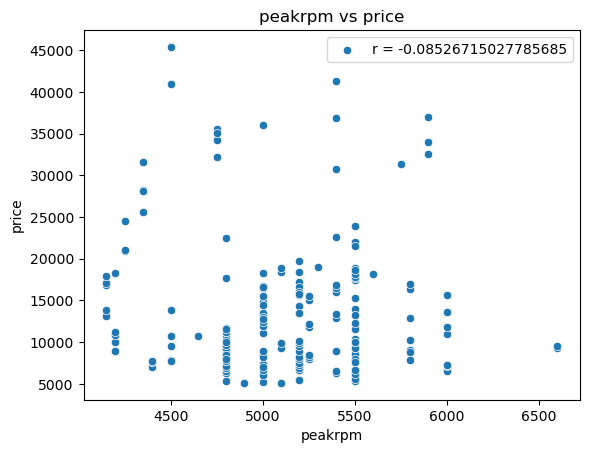

<Figure size 400x300 with 0 Axes>

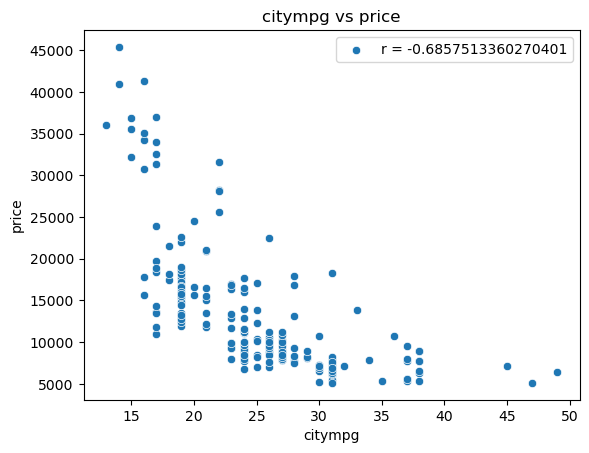

<Figure size 400x300 with 0 Axes>

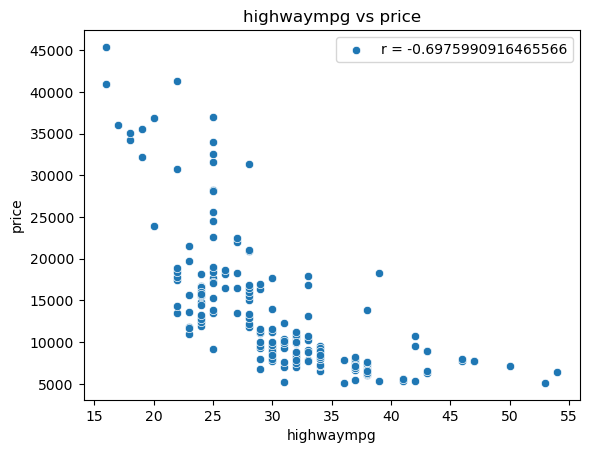

<Figure size 400x300 with 0 Axes>

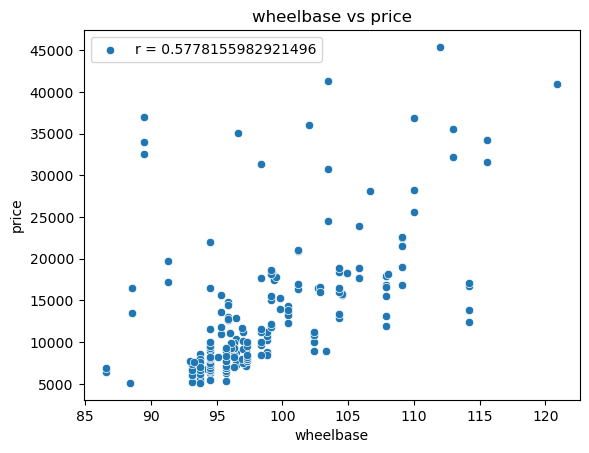

<Figure size 400x300 with 0 Axes>

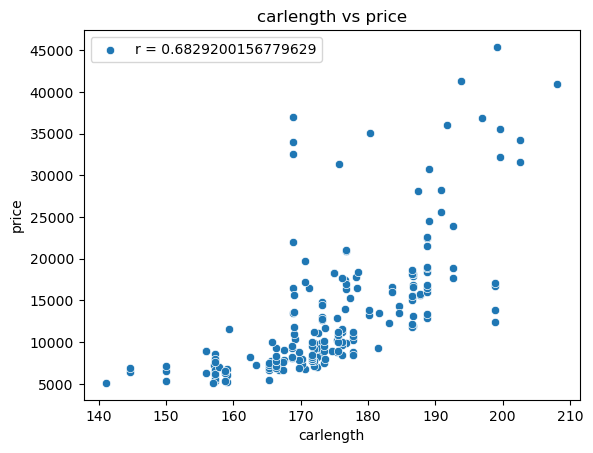

<Figure size 400x300 with 0 Axes>

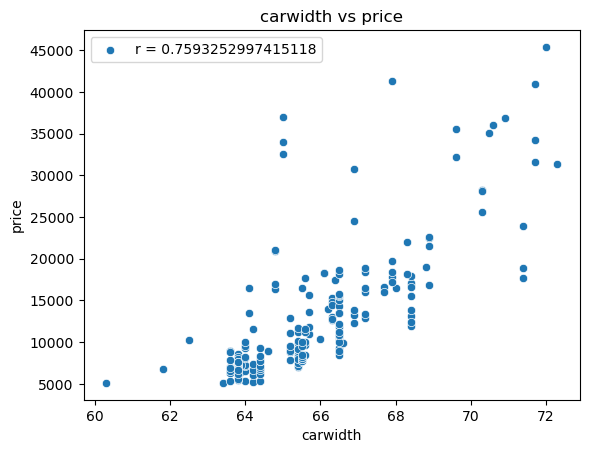

<Figure size 400x300 with 0 Axes>

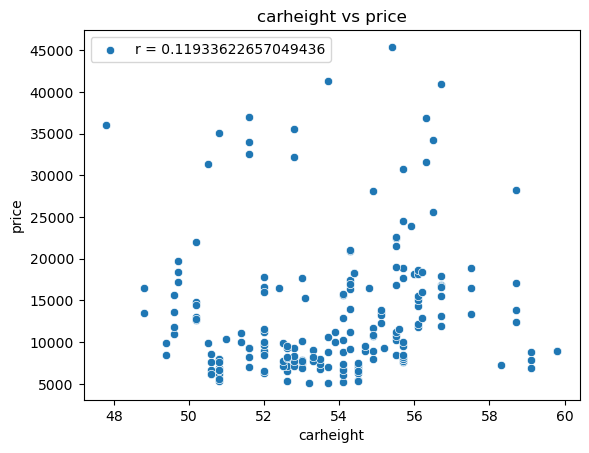

<Figure size 400x300 with 0 Axes>

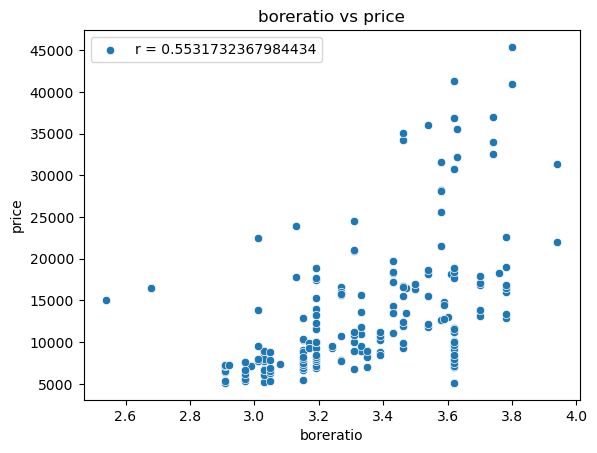

<Figure size 400x300 with 0 Axes>

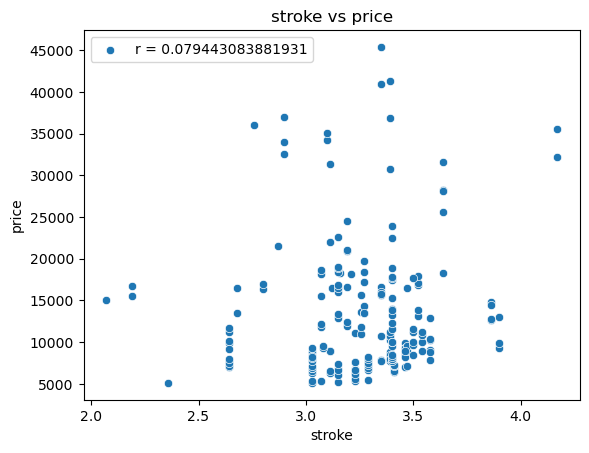

<Figure size 400x300 with 0 Axes>

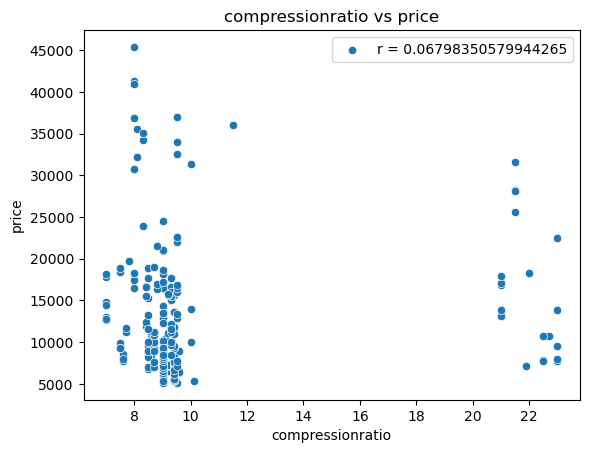

<Figure size 400x300 with 0 Axes>

In [23]:
for i in X_num:
    r = np.corrcoef(X_num[i], y)[0,1]
    sns.scatterplot(data=X_num, x=X_num[i], y=y, label=f"r = {r}")
    plt.title(f"{i} vs price")
    plt.figure(figsize=(4,3))
    plt.show()

    id, symbol, stroke, peakrpm, compressionration, 

In [21]:
X_num.columns

Index(['car_ID', 'symboling', 'curbweight', 'enginesize', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'boreratio', 'stroke', 'compressionratio'],
      dtype='object')

In [23]:
X_num.drop(['car_ID', 'symboling', 'peakrpm', 'stroke', 'compressionratio'], axis=1, inplace=True)

In [24]:
X_num

,curbweight,enginesize,horsepower,citympg,highwaympg,wheelbase,carlength,carwidth,carheight,boreratio
0,2548,130,111,21,27,88.6,168.8,64.1,48.8,3.47
1,2548,130,111,21,27,88.6,168.8,64.1,48.8,3.47
2,2823,152,154,19,26,94.5,171.2,65.5,52.4,2.68
3,2337,109,102,24,30,99.8,176.6,66.2,54.3,3.19
4,2824,136,115,18,22,99.4,176.6,66.4,54.3,3.19
...,...,...,...,...,...,...,...,...,...,...
200,2952,141,114,23,28,109.1,188.8,68.9,55.5,3.78
201,3049,141,160,19,25,109.1,188.8,68.8,55.5,3.78
202,3012,173,134,18,23,109.1,188.8,68.9,55.5,3.58
203,3217,145,106,26,27,109.1,188.8,68.9,55.5,3.01


In [25]:
X_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [26]:
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [27]:
cars.fueltype.value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

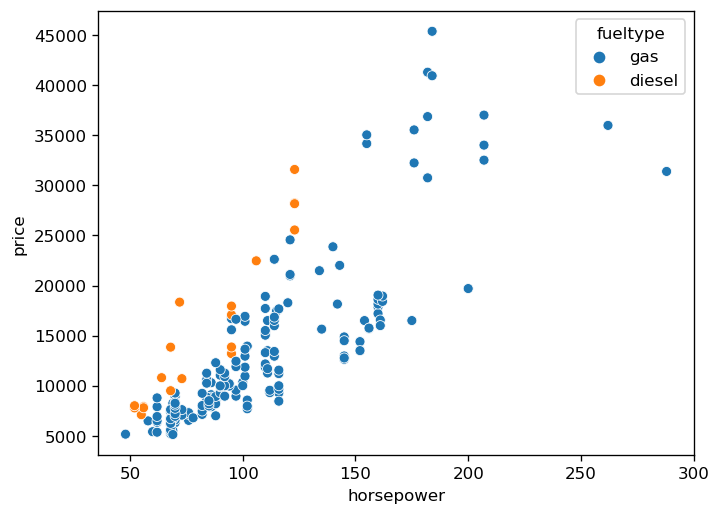

In [29]:
plt.figure(dpi=120)
sns.scatterplot(data=cars, x='horsepower', y='price', hue='fueltype')
plt.show()

<Axes: xlabel='carbody'>

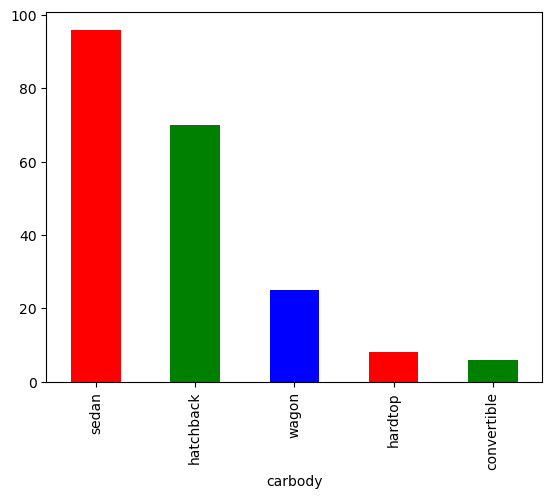

In [31]:
cars.carbody.value_counts().plot(kind='bar', color=list('rgb'))

In [32]:
X_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [33]:
X_cat.CarName.nunique()

147

In [35]:
X_cat.aspiration.value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [ ]:
X_cat

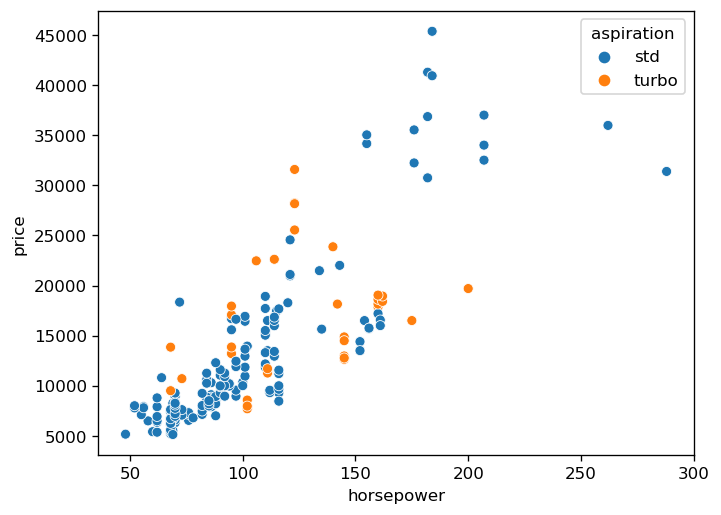

In [36]:
plt.figure(dpi=120)
sns.scatterplot(data=cars, x='horsepower', y='price', hue='aspiration')
plt.show()

In [37]:
for i in X_cat:
    if i == 'CarName':
        continue
    print(X_cat[i].value_counts())
    print()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

aspiration
std      168
turbo     37
Name: count, dtype: int64

doornumber
four    115
two      90
Name: count, dtype: int64

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

enginelocation
front    202
rear       3
Name: count, dtype: int64

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64



In [38]:
ordinal_features = ['carbody', 'enginetype', 'cylindernumber', 'fuelsystem']
nominal_features = ['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation']

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [53]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

ord_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder())
])

nom_pipeline = Pipeline([
    ('nominal', OneHotEncoder(sparse_output=False))
])

In [44]:
X_num

,curbweight,enginesize,horsepower,citympg,highwaympg,wheelbase,carlength,carwidth,carheight,boreratio
0,2548,130,111,21,27,88.6,168.8,64.1,48.8,3.47
1,2548,130,111,21,27,88.6,168.8,64.1,48.8,3.47
2,2823,152,154,19,26,94.5,171.2,65.5,52.4,2.68
3,2337,109,102,24,30,99.8,176.6,66.2,54.3,3.19
4,2824,136,115,18,22,99.4,176.6,66.4,54.3,3.19
...,...,...,...,...,...,...,...,...,...,...
200,2952,141,114,23,28,109.1,188.8,68.9,55.5,3.78
201,3049,141,160,19,25,109.1,188.8,68.8,55.5,3.78
202,3012,173,134,18,23,109.1,188.8,68.9,55.5,3.58
203,3217,145,106,26,27,109.1,188.8,68.9,55.5,3.01


In [45]:
X_cat_ord = X_cat[ordinal_features]
X_cat_ord

,carbody,enginetype,cylindernumber,fuelsystem
0,convertible,dohc,four,mpfi
1,convertible,dohc,four,mpfi
2,hatchback,ohcv,six,mpfi
3,sedan,ohc,four,mpfi
4,sedan,ohc,five,mpfi
...,...,...,...,...
200,sedan,ohc,four,mpfi
201,sedan,ohc,four,mpfi
202,sedan,ohcv,six,mpfi
203,sedan,ohc,six,idi


In [46]:
X_cat_nom = X_cat[nominal_features]
X_cat_nom

,fueltype,aspiration,doornumber,drivewheel,enginelocation
0,gas,std,two,rwd,front
1,gas,std,two,rwd,front
2,gas,std,two,rwd,front
3,gas,std,four,fwd,front
4,gas,std,four,4wd,front
...,...,...,...,...,...
200,gas,std,four,rwd,front
201,gas,turbo,four,rwd,front
202,gas,std,four,rwd,front
203,diesel,turbo,four,rwd,front


In [48]:
X_num_tr = num_pipeline.fit_transform(X_num)
X_num_tr

array([[-0.01456628,  0.07444893,  0.17448278, ..., -0.84478235,
        -2.0204173 ,  0.51907138],
       [-0.01456628,  0.07444893,  0.17448278, ..., -0.84478235,
        -2.0204173 ,  0.51907138],
       [ 0.51488192,  0.60404617,  1.26453643, ..., -0.19056612,
        -0.54352748, -2.40488029],
       ...,
       [ 0.87875722,  1.10957081,  0.75753473, ...,  1.39824472,
         0.72823876,  0.9262039 ],
       [ 1.27343679,  0.43553795,  0.04773235, ...,  1.39824472,
         0.72823876, -1.18348276],
       [ 0.97502053,  0.33924755,  0.25053303, ...,  1.39824472,
         0.72823876,  1.66644483]])

In [55]:
X_cat_ord_tr = ord_pipeline.fit_transform(X_cat_ord)
X_cat_ord_tr

array([[0., 0., 2., 5.],
       [0., 0., 2., 5.],
       [2., 5., 3., 5.],
       [3., 3., 2., 5.],
       [3., 3., 1., 5.],
       [3., 3., 1., 5.],
       [3., 3., 1., 5.],
       [4., 3., 1., 5.],
       [3., 3., 1., 5.],
       [2., 3., 1., 5.],
       [3., 3., 2., 5.],
       [3., 3., 2., 5.],
       [3., 3., 3., 5.],
       [3., 3., 3., 5.],
       [3., 3., 3., 5.],
       [3., 3., 3., 5.],
       [3., 3., 3., 5.],
       [3., 3., 3., 5.],
       [2., 2., 4., 1.],
       [2., 3., 2., 1.],
       [3., 3., 2., 1.],
       [2., 3., 2., 1.],
       [2., 3., 2., 1.],
       [2., 3., 2., 5.],
       [2., 3., 2., 1.],
       [3., 3., 2., 1.],
       [3., 3., 2., 1.],
       [3., 3., 2., 5.],
       [4., 3., 2., 1.],
       [2., 3., 2., 4.],
       [2., 3., 2., 0.],
       [2., 3., 2., 0.],
       [2., 3., 2., 0.],
       [2., 3., 2., 0.],
       [2., 3., 2., 0.],
       [3., 3., 2., 0.],
       [4., 3., 2., 0.],
       [2., 3., 2., 0.],
       [2., 3., 2., 0.],
       [3., 3., 2., 0.],


In [56]:
X_cat_nom_tr = nom_pipeline.fit_transform(X_cat_nom)
X_cat_nom_tr

array([[0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [59]:
X_final = np.concatenate((X_num_tr, X_cat_ord_tr, X_cat_nom_tr), axis=1)
X_final

array([[-0.01456628,  0.07444893,  0.17448278, ...,  1.        ,
         1.        ,  0.        ],
       [-0.01456628,  0.07444893,  0.17448278, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.51488192,  0.60404617,  1.26453643, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.87875722,  1.10957081,  0.75753473, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.27343679,  0.43553795,  0.04773235, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.97502053,  0.33924755,  0.25053303, ...,  1.        ,
         1.        ,  0.        ]])

In [60]:
X_final.shape

(205, 25)

In [71]:
num_cols = X_num.columns
num_cols

Index(['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio'],
      dtype='object')

In [68]:
ord_pipeline.named_steps.ordinal.categories_

[array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object),
 array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
 array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
       dtype=object),
 array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
       dtype=object)]

In [70]:
ord_cols = ord_pipeline.named_steps.ordinal.get_feature_names_out()
ord_cols

array(['carbody', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype=object)

In [73]:
nom_cols = nom_pipeline.named_steps.nominal.get_feature_names_out()
nom_cols

array(['fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear'], dtype=object)

In [74]:
X_final

array([[-0.01456628,  0.07444893,  0.17448278, ...,  1.        ,
         1.        ,  0.        ],
       [-0.01456628,  0.07444893,  0.17448278, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.51488192,  0.60404617,  1.26453643, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.87875722,  1.10957081,  0.75753473, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.27343679,  0.43553795,  0.04773235, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.97502053,  0.33924755,  0.25053303, ...,  1.        ,
         1.        ,  0.        ]])

In [75]:
cols = list(num_cols) + list(ord_cols) + list(nom_cols)
cols

['curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'carbody',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginelocation_rear']

In [77]:
X_final = pd.DataFrame(X_final, columns=cols)
X_final

,curbweight,enginesize,horsepower,citympg,highwaympg,wheelbase,carlength,carwidth,carheight,boreratio,...,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
0,-0.014566,0.074449,0.174483,-0.646553,-0.546059,-1.690772,-0.426521,-0.844782,-2.020417,0.519071,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.014566,0.074449,0.174483,-0.646553,-0.546059,-1.690772,-0.426521,-0.844782,-2.020417,0.519071,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.514882,0.604046,1.264536,-0.953012,-0.691627,-0.708596,-0.231513,-0.190566,-0.543527,-2.404880,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,-0.420797,-0.431076,-0.053668,-0.186865,-0.109354,0.173698,0.207256,0.136542,0.235942,-0.517266,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.516807,0.218885,0.275883,-1.106241,-1.273900,0.107110,0.207256,0.230001,0.235942,-0.517266,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.763241,0.339248,0.250533,-0.340094,-0.400490,1.721873,1.198549,1.398245,0.728239,1.666445,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
201,0.949992,0.339248,1.416637,-0.953012,-0.837195,1.721873,1.198549,1.351515,0.728239,1.666445,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
202,0.878757,1.109571,0.757535,-1.106241,-1.128332,1.721873,1.198549,1.398245,0.728239,0.926204,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
203,1.273437,0.435538,0.047732,0.119594,-0.546059,1.721873,1.198549,1.398245,0.728239,-1.183483,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=123)

In [80]:
X_train

,curbweight,enginesize,horsepower,citympg,highwaympg,wheelbase,carlength,carwidth,carheight,boreratio,...,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
197,0.936515,0.339248,0.250533,-0.186865,-0.400490,0.922815,1.198549,0.603839,1.548733,1.666445,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
112,1.340821,0.604046,-0.231119,0.426052,0.327351,1.522109,1.027916,1.164596,1.220535,1.370348,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
95,-1.015705,-0.719947,-0.890221,0.885740,0.909625,-0.708596,-0.686533,-0.984972,-0.174305,-0.665314,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
169,-0.008790,0.459611,0.301233,-0.186865,-0.109354,-0.059361,0.174754,-0.143836,-0.707626,1.074252,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
184,-0.561342,-0.719947,-1.321172,1.805116,2.219739,-0.242478,-0.190886,-0.190566,0.810288,-1.183483,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,1.827913,1.976184,1.974339,-1.565929,-1.565037,1.871697,1.864827,2.332839,1.056437,1.074252,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
98,-1.054210,-0.719947,-0.890221,0.885740,0.909625,-0.608714,-0.946544,-0.984972,-0.174305,-0.665314,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
66,0.278074,0.170739,-0.814171,0.885740,1.200761,1.022697,0.077250,0.089812,0.276967,0.371023,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
126,0.385889,1.615095,2.608091,-1.259470,-0.837195,-1.540948,-0.418396,-0.424215,-0.871725,1.518397,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [81]:
X_test

,curbweight,enginesize,horsepower,citympg,highwaympg,wheelbase,carlength,carwidth,carheight,boreratio,...,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
88,-0.293730,-0.407003,0.301233,-0.340094,-0.109354,-0.408949,-0.134009,-0.237296,-0.871725,-0.591290,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
72,2.174461,2.578000,1.289887,-1.412700,-1.856174,-0.359008,0.507894,2.145920,-1.199923,0.482059,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
114,1.789408,0.604046,-0.231119,-0.033636,-0.837195,2.570873,2.019209,1.164596,2.041030,1.370348,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
158,-0.540164,-0.407003,-1.219772,1.345428,0.764056,-0.508831,-0.629655,-0.704593,-0.297379,-0.221170,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
163,-0.744242,-0.695874,-0.864871,0.579282,0.472920,-0.708596,-0.434647,-0.891512,-0.461478,-0.517266,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
159,-0.540164,-0.407003,-1.219772,1.958346,2.365308,-0.508831,-0.629655,-0.704593,-0.379429,-0.221170,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
185,-0.661456,-0.431076,-0.484619,0.272823,0.472920,-0.242478,-0.190886,-0.190566,0.810288,-0.517266,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
93,-1.023406,-0.719947,-0.890221,0.885740,0.909625,-0.708596,-0.312767,-0.984972,-0.092256,-0.665314,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
91,-1.227484,-0.719947,-0.890221,0.885740,0.909625,-0.708596,-0.710909,-0.984972,0.317992,-0.665314,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
19,-1.312196,-0.888455,-0.864871,1.958346,1.783034,-0.708596,-1.474692,-1.078431,-0.707626,-1.109459,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [82]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error


In [83]:
models = [
    ('linear_regression', LinearRegression()),
    ('SGD', SGDRegressor()),
    ('random forest', RandomForestRegressor(n_estimators=2000)),
    ('neighbors', KNeighborsRegressor()),
    ('tree', DecisionTreeRegressor(max_depth=1000))
]

In [84]:
for name, model in models:

    model.fit(X_train, y_train)

    print(f"{name}")
    y_hat = model.predict(X_train)
    print(f"Training error: {mean_absolute_error(y_train, y_hat):.2f}")
    print(f"Training accuracy: {r2_score(y_train, y_hat):.2f}")
   
    print('-'*100)
    
    y_hat = model.predict(X_test)
    print(f"Testing error: {mean_absolute_error(y_test, y_hat):.2f}")
    print(f"Testing accuracy: {r2_score(y_test, y_hat):.2f}")

    print()

linear_regression
Training error: 2161.70
Training accuracy: 0.87
----------------------------------------------------------------------------------------------------
Testing error: 1557.76
Testing accuracy: 0.87

SGD
Training error: 2463.47
Training accuracy: 0.83
----------------------------------------------------------------------------------------------------
Testing error: 1702.47
Testing accuracy: 0.86

random forest
Training error: 615.58
Training accuracy: 0.99
----------------------------------------------------------------------------------------------------
Testing error: 968.52
Testing accuracy: 0.96

neighbors
Training error: 1861.32
Training accuracy: 0.89
----------------------------------------------------------------------------------------------------
Testing error: 1558.00
Testing accuracy: 0.83

tree
Training error: 70.15
Training accuracy: 1.00
----------------------------------------------------------------------------------------------------
Testing error: 1358.